In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import os
import sys
from datetime import datetime, timedelta

In [60]:
# Add the library to the path
sys.path.append(r"C:\ERDC\BarSed")

# Import the library modules

from lib.data_classes.Run import Run
from lib.data_classes.WaveGauge import WaveGauge
from lib.data_classes.WaveMaker import WaveMaker

In [9]:
# Set the important paths
barsed_data_path = r"D:\ERDC\BarSed"

# Name of the folder containing the wave data
WG_data_folder_name = r"WG" 

# Path to where I'm storing the bathymetry data
WG_data_path = os.path.join(barsed_data_path, WG_data_folder_name)

print(f"Bathy file path: {WG_data_path}")

Bathy file path: D:\ERDC\BarSed\WG


In [33]:
# Run number
run_number = "020"

# Run id
run_id = f"RUN{run_number}"

# Mat file for the first run
run_001_name = r"{}.mat".format(run_id)

# Path to the first run
run_001_path = os.path.join(WG_data_path, run_001_name)

print("Run001 mat file path: {}".format(run_001_path))

Run001 mat file path: D:\ERDC\BarSed\WG\RUN020.mat


In [34]:
test_run = Run(id = run_id, wave_file_path=run_001_path)

In [35]:
test_run.load_wave_data()

New Number of 17 wave gauges


In [36]:
print(test_run)

id: RUN020
Start Date: 2015-01-23
Wave Data File path: D:\ERDC\BarSed\WG\RUN020.mat
Num pressure gagues: None
Num advs: None


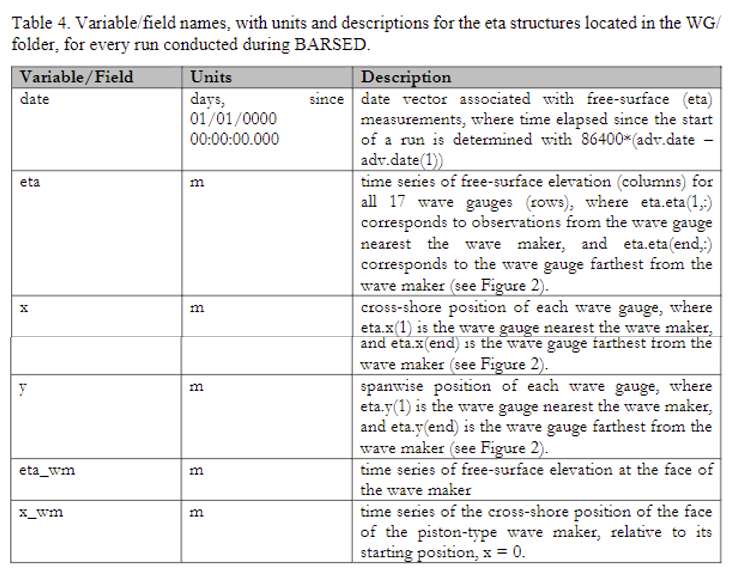

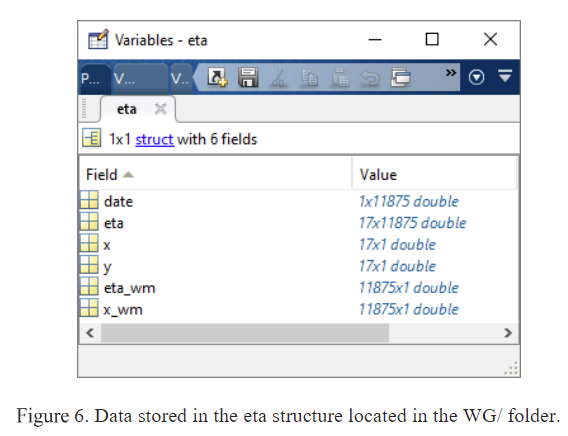

Notes on the Wave Gauges:

* There are a total of 17 wave gauges
* First 3 are self calibrating [0->2]
* Next 8 are fixed square wave gauges [3->10]
* Next 6 are ultrasonic wave gauges [11->16]

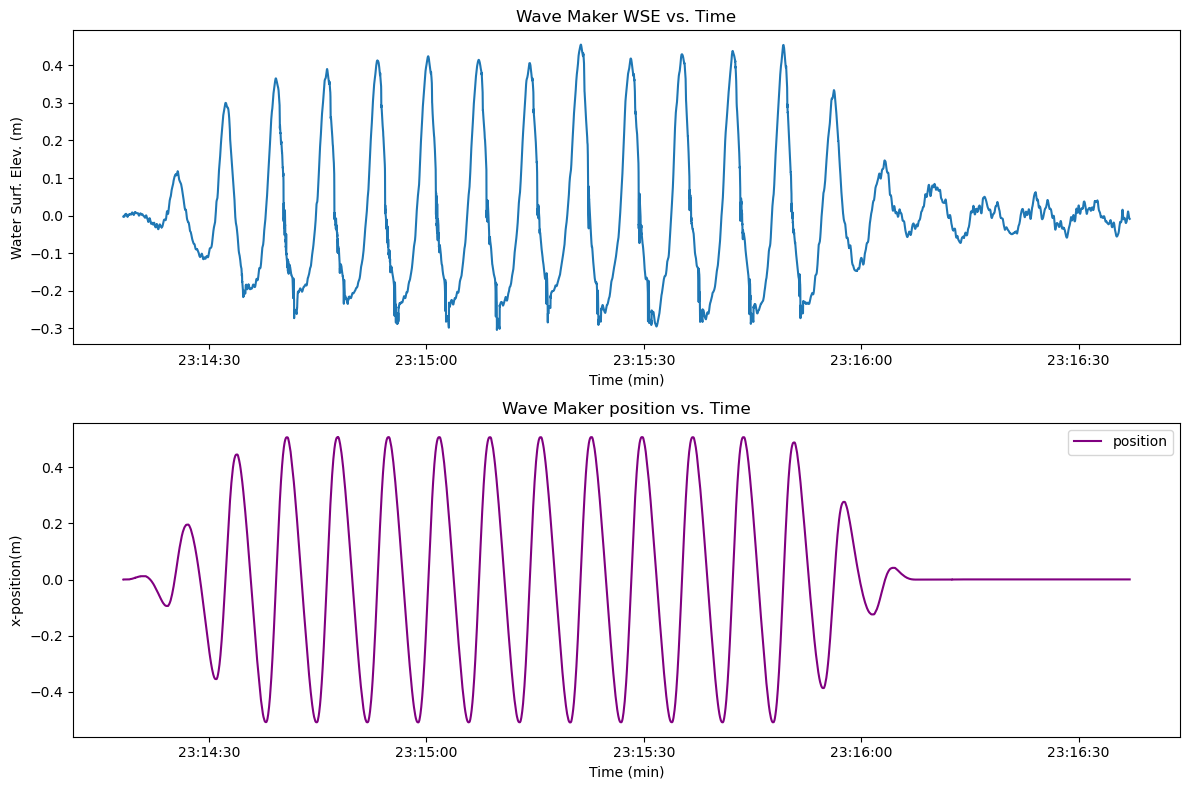

In [37]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize= (12, 8))

# Plot the water surface elevation in front of the wave maker
test_run.wave_maker.quick_wse_plot(axs = axs[0])
test_run.wave_maker.quick_position_plot(axs= axs[1], color = "purple", label ="position", legend = True)

plt.tight_layout()

In [38]:
# wse -> Water Surface Elevation

# Construct the wse elevation as mesured by the wave gauges 
# (doesn't include wave maker)
test_run.construct_wave_gauge_wse()

# Make an array of all the wave gauge locations
test_run.get_wave_gauge_locations()

# Construct the elevation of the flume as measured by the wave gauges and 
# the wave maker
test_run.construct_flume_wse()

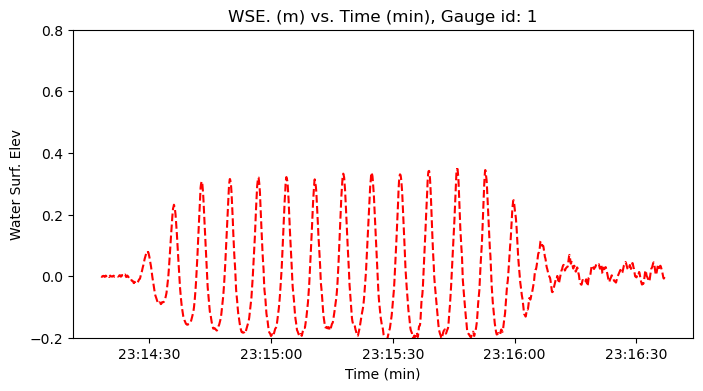

In [39]:
# Plot the wse. at a specific gauge for all time
test_run.wave_gauges[0].quick_plot(color=  "red", ylim= (-0.2, 0.8), linestyle = "--")

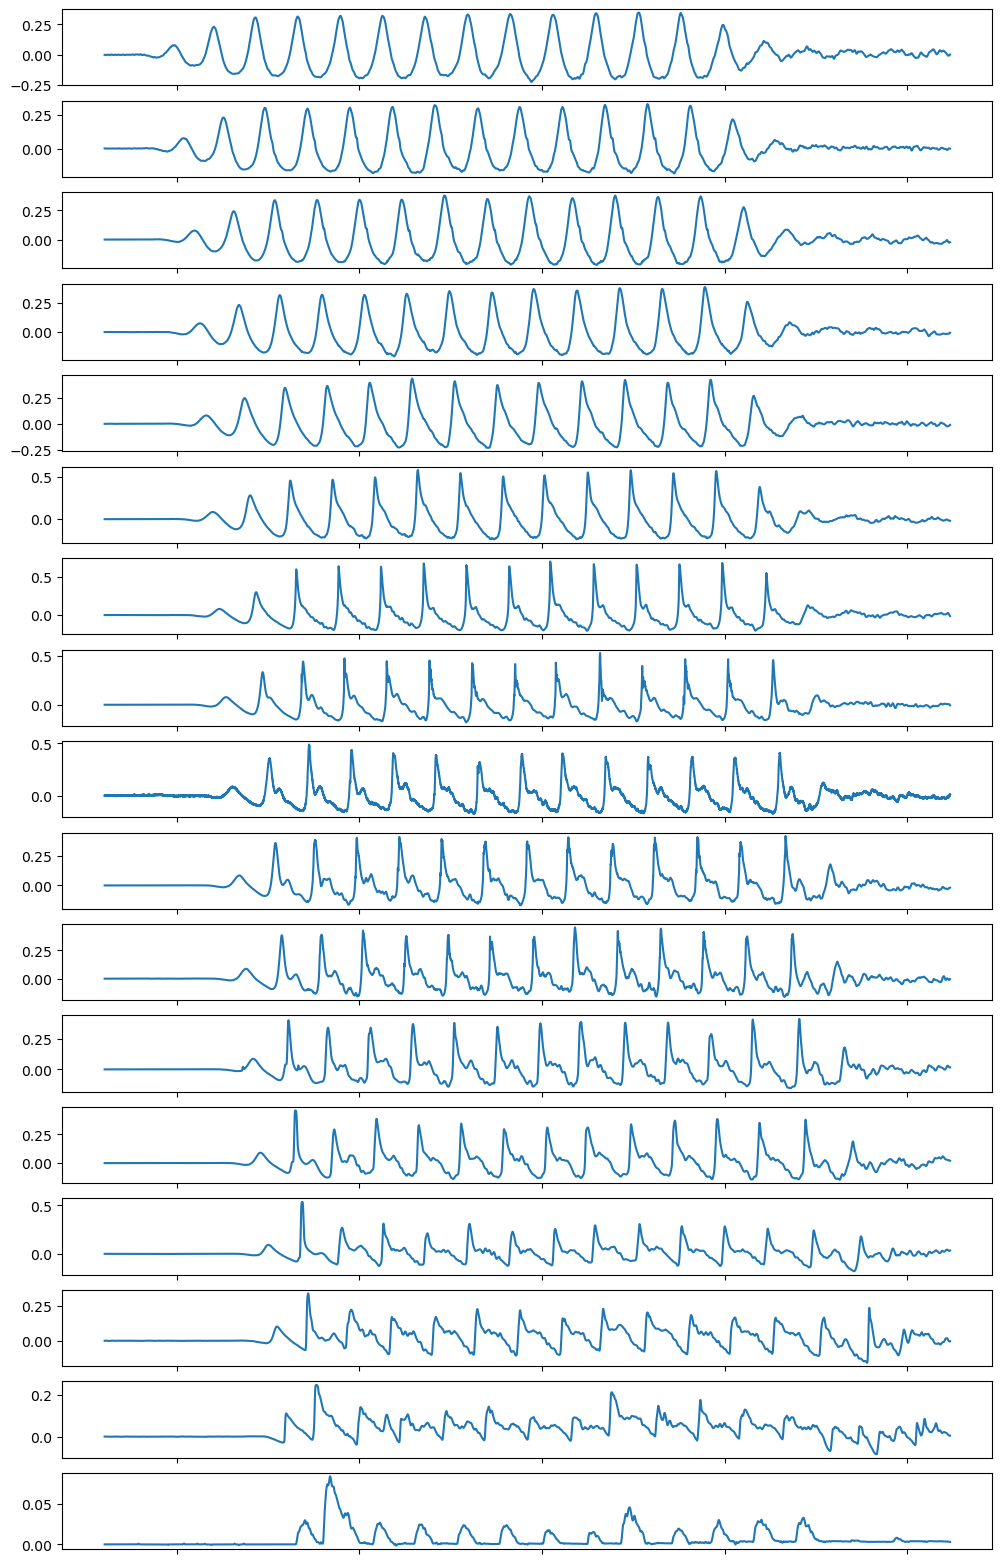

In [40]:
# Plot the wse at different gauges
gauge_ids= [val for val in range(1, 18)]
test_run.quick_plot_wave_gauges(gauge_ids= gauge_ids, xlabel = False, ylabel=False, figsize = (12, 20))

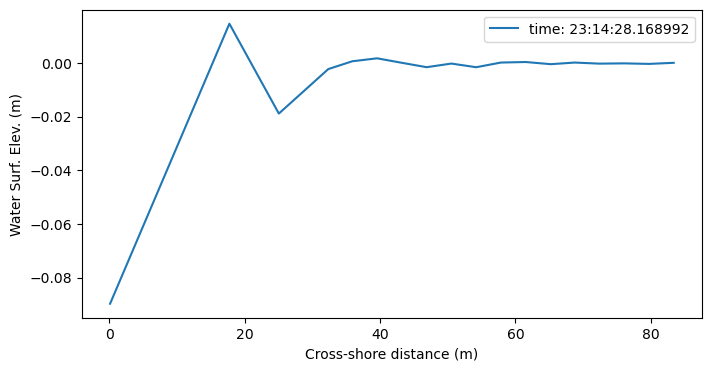

In [45]:
# Plot the wse across the whole flume including the wave maker
test_run.quick_flume_wse_plot(time_index = 1000, legend = True)

In [19]:
test_run.date_time[-1]

datetime.datetime(2015, 1, 30, 20, 16, 42, 394928)

In [20]:
for gauge in test_run.wave_gauges:
    print(gauge.location)

(17.728, -1.269)
(25.037, -1.271)
(32.342, -1.268)
(35.895, -1.383)
(39.556, -1.369)
(43.215, -1.374)
(46.876, -1.372)
(50.53, -1.366)
(54.192, -1.37)
(57.85, -1.37)
(61.509, -1.368)
(65.205, -1.327)
(68.759, -1.367)
(72.405, -1.359)
(76.068, -1.369)
(79.738, -1.355)
(83.385, -1.37)


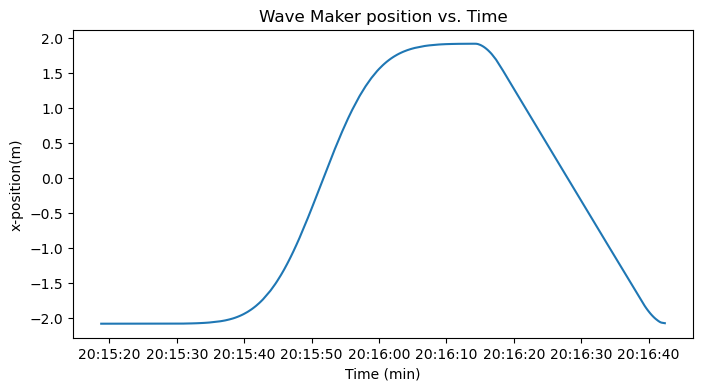

In [21]:
test_run.wave_maker.quick_position_plot()

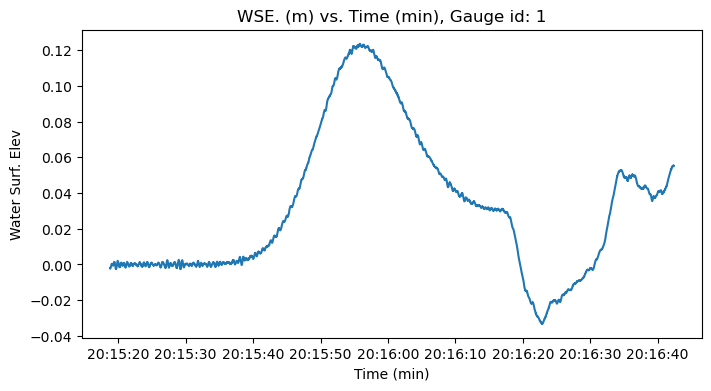

In [22]:
test_run.wave_gauges[0].quick_plot()

In [23]:
# Get the bathymetry
# Set the important paths
barsed_data_path = r"D:\ERDC\BarSed"

# Name of the bathy data binary
bathy_file_name = r"bathy.mat"

# Path to where I'm storing the bathymetry data
bathy_file_path = os.path.join(barsed_data_path, bathy_file_name)

print(f"Bathy file path: {bathy_file_path}")

# Load the .mat file
bathy_dict = scipy.io.loadmat(bathy_file_path)

display(bathy_dict.keys())

# Get the bathymetry data
bathy_df = pd.DataFrame(bathy_dict["bathy"], columns = ["x_loc", "z_loc"])

display(bathy_df)

Bathy file path: D:\ERDC\BarSed\bathy.mat


dict_keys(['__header__', '__version__', '__globals__', 'bathy'])

,x_loc,z_loc
0,14.064,0.000
1,14.064,0.152
2,17.724,0.152
3,21.381,0.330
4,25.034,0.432
5,28.688,0.533
6,32.339,0.837
7,35.996,1.142
8,39.655,1.295
9,43.313,1.447


In [52]:
test_run.flume_wse.shape[0]

13888

In [56]:
test_run.flume_wse_locs

array([[1.0743e-04, 1.7728e+01, 2.5037e+01, ..., 7.6068e+01, 7.9738e+01,
        8.3385e+01],
       [3.2004e-04, 1.7728e+01, 2.5037e+01, ..., 7.6068e+01, 7.9738e+01,
        8.3385e+01],
       [2.4917e-04, 1.7728e+01, 2.5037e+01, ..., 7.6068e+01, 7.9738e+01,
        8.3385e+01],
       ...,
       [4.6177e-04, 1.7728e+01, 2.5037e+01, ..., 7.6068e+01, 7.9738e+01,
        8.3385e+01],
       [3.2004e-04, 1.7728e+01, 2.5037e+01, ..., 7.6068e+01, 7.9738e+01,
        8.3385e+01],
       [4.6177e-04, 1.7728e+01, 2.5037e+01, ..., 7.6068e+01, 7.9738e+01,
        8.3385e+01]])

MovieWriter PillowWriter unavailable; using Pillow instead.


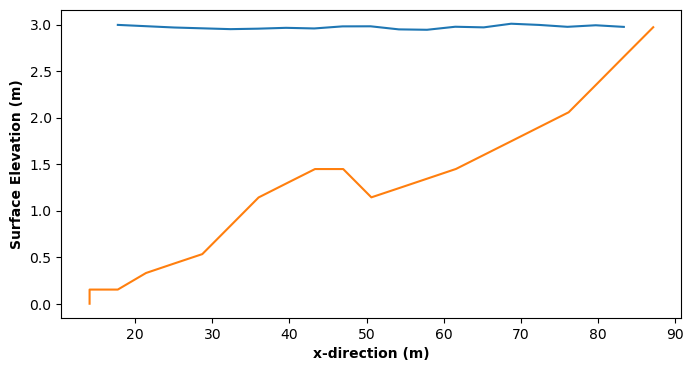

In [59]:
from matplotlib.animation import FuncAnimation
from scipy import interpolate

# Make the animation
fig = plt.figure(figsize = (8, 4))

ax = fig.add_subplot()

def update_plot(index):
    """
    Update the next frame of the animation
    """
    # Get the bathymetry data
    # get the measure water surface elevation and the location of the wave gauges
    gauge_wse = test_run.flume_wse[index, 1:]

    wave_gauge_location = test_run.flume_wse_locs[index, 1:]
    
    bathy_x_loc = bathy_df["x_loc"]
    bathy_z_loc = bathy_df["z_loc"]
    
    # shift the water surface elevation to account for the height of the water
    shifted_wse =  gauge_wse + bathy_z_loc.max()

    # Calc the analytical solution
    ax.clear()

    # Plot the bathymetry
    ax.plot(wave_gauge_location, shifted_wse)
    ax.plot(bathy_x_loc, bathy_z_loc)

    # Plot the wave gauge data
    ax.set_xlabel("x-direction (m)", weight = "bold")
    ax.set_ylabel("Surface Elevation (m)", weight = "bold")
    # ax.legend()

ani = FuncAnimation(fig, update_plot, frames = list(range(0, test_run.flume_wse.shape[0] - 1, 100)),
                    interval = 100)

ani.save("measured_flume_wse.gif", writer = "PillowWriter")
plt.show()